In [9]:
# Import necessary libraries
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import keras
from keras import layers


In [10]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("len of x_train:",len(x_train))
print("len of y_train:",len(y_train))
print("len of x_test:",len(x_test))
print("len of y_test:",len(y_test))

len of x_train: 60000
len of y_train: 60000
len of x_test: 10000
len of y_test: 10000


In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

'''# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]'''

'# Reserve 10,000 samples for validation\nx_val = x_train[-10000:]\ny_val = y_train[-10000:]\nx_train = x_train[:-10000]\ny_train = y_train[:-10000]'

In [12]:
x_train.shape

(60000, 784)

In [13]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(x_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:",accuracy)  
print("Precision:",precision)  #the ratio of correctly predicted positive observations to the total predicted positives.
print("Recall:",recall)  #the ratio of correctly predicted positive observations to the all observations in actual class.

Accuracy: 0.9688
Precision: 0.9690205934964162
Recall: 0.9688


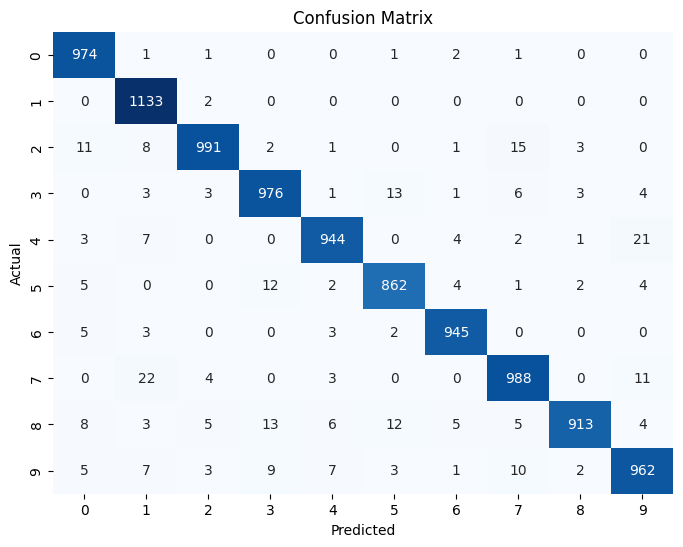

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       980
         1.0       0.95      1.00      0.98      1135
         2.0       0.98      0.96      0.97      1032
         3.0       0.96      0.97      0.97      1010
         4.0       0.98      0.96      0.97       982
         5.0       0.97      0.97      0.97       892
         6.0       0.98      0.99      0.98       958
         7.0       0.96      0.96      0.96      1028
         8.0       0.99      0.94      0.96       974
         9.0       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [14]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
cls_report = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(cls_report)

